<font size='3'><b>Youtube top channels</b></font>

In [1]:
import pandas as pd 
import seaborn as sns 

In [2]:
df=pd.read_csv('youtube.csv')

In [3]:
#Top 5/ bottom 5 rows 
df.head()
df.tail()

,Rank,Grade,Channel name,Video Uploads,Subscribers,Video views
4995,"4,996th",B+,Uras Benlioğlu,706,2072942,441202795
4996,"4,997th",B+,HI-TECH MUSIC LTD,797,1055091,377331722
4997,"4,998th",B+,Mastersaint,110,3265735,311758426
4998,"4,999th",B+,Bruce McIntosh,3475,32990,14563764
4999,"5,000th",B+,SehatAQUA,254,21172,73312511


In [4]:
#Check null 
df.isnull().sum()

Rank             0
Grade            0
Channel name     0
Video Uploads    0
Subscribers      0
Video views      0
dtype: int64

In [5]:
#Check duplicates
df.duplicated().sum()

np.int64(0)

In [6]:
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} rows")

Dataset contains 5000 rows and 6 rows


In [7]:
#Total info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rank           5000 non-null   object
 1   Grade          5000 non-null   object
 2   Channel name   5000 non-null   object
 3   Video Uploads  5000 non-null   object
 4   Subscribers    5000 non-null   object
 5   Video views    5000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [8]:
#Further clean 
sum(df['Subscribers']=="-- ")


387

In [9]:
import numpy as np 

In [10]:
#Clean Subscribers  column 
df['Subscribers']=df['Subscribers'].replace('-- ',np.nan)

In [11]:
sum(df['Subscribers']=='-- ')

0

In [12]:
pd.options.display.float_format='{:.2f}'.format

In [13]:
df.describe()

,Video views
count,5000.00
mean,1071449400.15
std,2003843972.12
min,75.00
25%,186232945.75
50%,482054780.00
75%,1124367826.75
max,47548839843.00


In [14]:
df.isnull().sum()

Rank               0
Grade              0
Channel name       0
Video Uploads      0
Subscribers      387
Video views        0
dtype: int64

<Axes: >

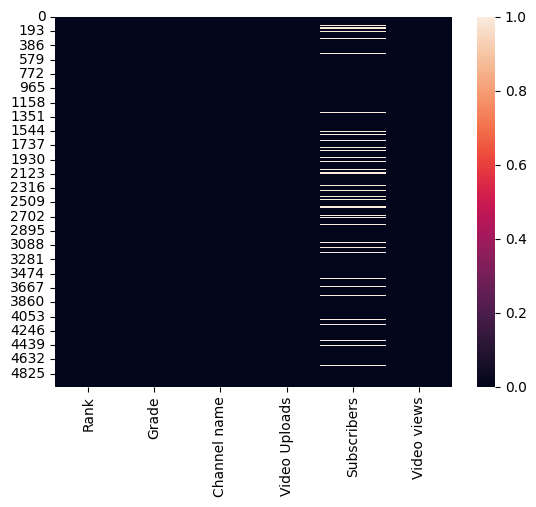

In [15]:
sns.heatmap(df.isnull())

In [16]:
#Drop null values
df.dropna(axis=0,how='any',inplace=True)

In [17]:
df.shape

(4613, 6)

<Axes: >

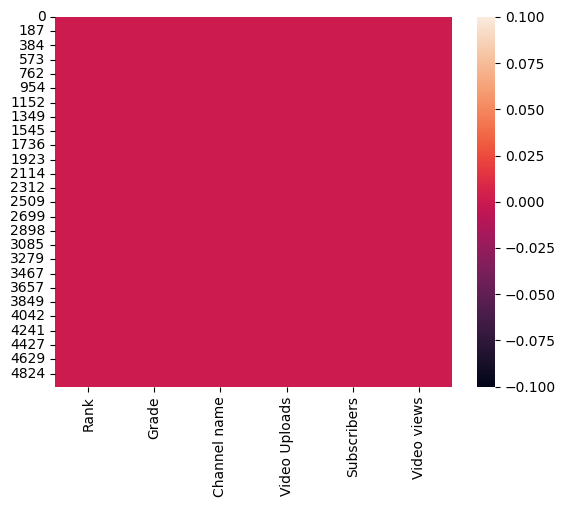

In [18]:
sns.heatmap(df.isnull())

In [19]:
df['Subscribers']=df['Subscribers'].astype(int)

In [20]:
df.dtypes

Rank             object
Grade            object
Channel name     object
Video Uploads    object
Subscribers       int64
Video views       int64
dtype: object

In [21]:
#Clean the rank column 
df['Rank']=df['Rank'].str[0:-2]

In [22]:
df['Rank']=df['Rank'].str.replace(',','').astype(int)

In [23]:
#Clean Video Uploads column 
df['Video Uploads']=df['Video Uploads'].replace('--',np.nan)

In [24]:
df.dropna(axis=0,how='any',inplace=True)

In [25]:
df.shape

(4610, 6)

In [26]:
df['Video Uploads']=df['Video Uploads'].astype(int)

In [27]:
df.dtypes

Rank              int64
Grade            object
Channel name     object
Video Uploads     int64
Subscribers       int64
Video views       int64
dtype: object

In [28]:
#Cleanb grade column 
df['Grade'].value_counts()

Grade
B+      2722
A-       941
A        897
A+        40
A++       10
Name: count, dtype: int64

In [29]:
df['Grade'].unique()

array(['A++ ', 'A+ ', 'A ', 'A- ', 'B+ '], dtype=object)

In [30]:
df['Grade']=df['Grade'].map({'A++ ':5,'A+ ':4,'A- ':3,'A ':2,'B+ ':1})

In [31]:
df.dropna(axis=0,inplace=True)

In [32]:
df['Grade']=df['Grade'].astype(int)

In [33]:
#Add this new column of average views
df['Average Views']=df['Video views']/df['Video Uploads']

In [34]:
#Top 5 channels with maximum number of video uploads
df.sort_values('Video Uploads')['Channel name'].head(5)

4474             hyghhopes
628             cocoz toon
4100       DenzelCurryVEVO
4975            Funny Kids
2404    ItsHARSH007 Gaming
Name: Channel name, dtype: object

In [35]:
df.columns

Index(['Rank', 'Grade', 'Channel name', 'Video Uploads', 'Subscribers',
       'Video views', 'Average Views'],
      dtype='object')

In [36]:
df[['Rank', 'Grade', 'Video Uploads', 'Subscribers',
       'Video views', 'Average Views']].corr()

,Rank,Grade,Video Uploads,Subscribers,Video views,Average Views
Rank,1.00,-0.70,-0.07,-0.38,-0.40,-0.15
Grade,-0.70,1.00,0.07,0.29,0.32,0.08
Video Uploads,-0.07,0.07,1.00,0.01,0.09,-0.06
Subscribers,-0.38,0.29,0.01,1.00,0.79,0.29
Video views,-0.40,0.32,0.09,0.79,1.00,0.29
Average Views,-0.15,0.08,-0.06,0.29,0.29,1.00


<Axes: >

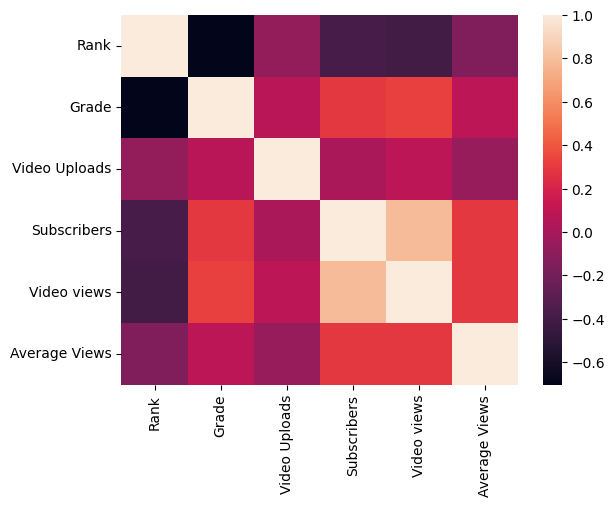

In [37]:
sns.heatmap(df[['Rank', 'Grade', 'Video Uploads', 'Subscribers',
       'Video views', 'Average Views']].corr())
#Seems that video views and number of subscribers are correlated 

<Axes: xlabel='Grade', ylabel='Video Uploads'>

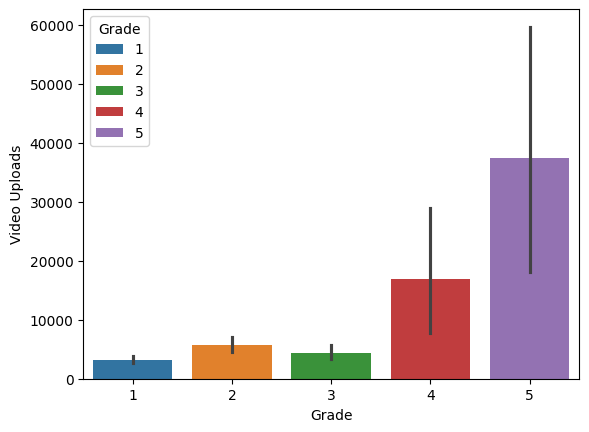

In [72]:
#which grade has a maximum number of average video uploads
sns.barplot(x='Grade',y='Video Uploads',data=df,hue='Grade',palette='tab10',estimator='mean')

In [73]:
df.groupby('Grade')['Video Uploads'].mean()

Grade
1    3136.16
2    5709.86
3    4382.58
4   16960.30
5   37450.70
Name: Video Uploads, dtype: float64

In [40]:
#Which grade has the highest avg views

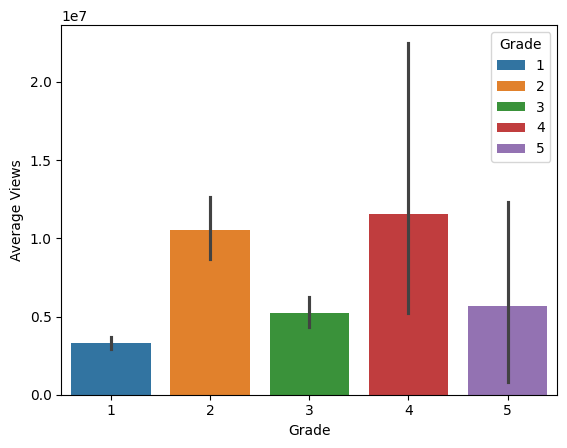

In [75]:
sns.barplot(x='Grade',y='Average Views',data=df,hue='Grade',palette='tab10',estimator='mean');

In [76]:
#Which Grade has the hughest number of subscribers 
df.groupby('Grade')['Subscribers'].mean()

Grade
1    1535207.95
2    5107136.29
3    2798520.38
4   11726947.47
5   22281762.50
Name: Subscribers, dtype: float64

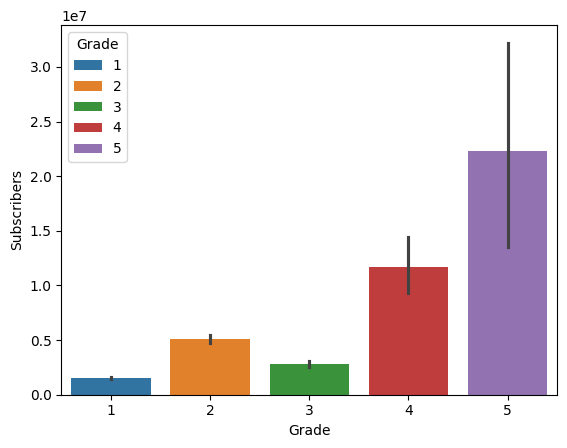

In [77]:
sns.barplot(x='Grade',y='Subscribers',data=df,hue='Grade',palette='tab10',estimator='mean');

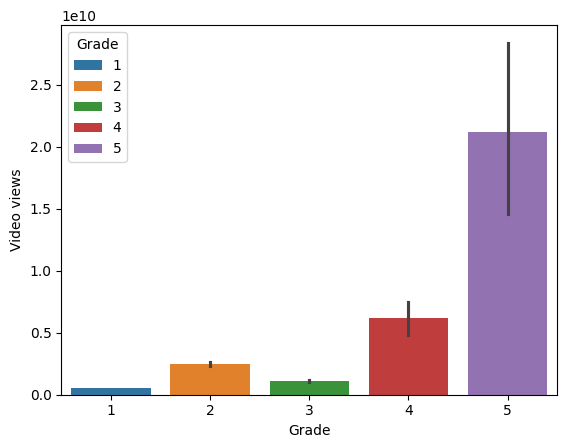

In [80]:
#Which grade has the highest video views 
sns.barplot(x='Grade',y='Video views',data=df,hue='Grade',palette='tab10',estimator='mean');

In [81]:
df.groupby('Grade')['Video views'].mean()

Grade
1     555183839.09
2    2497972949.11
3    1102450027.69
4    6168741772.73
5   21199091192.80
Name: Video views, dtype: float64